## Postprocessing outputs from 4 dimensional problem or subproblem1 for 9 dimensional problem to receive final suggestions for experiments

This Notebook performs the postprocessing for the 4 dimensional problem or subproblem 1 of the 9 dimensional problem.

As components we have the polymer PA56, phytic acid, an amino-based component and a metallic-based component.

Here loaded from Outputs_orig folder corresponding to the results shown in the paper, but can also run Sampling_4components notebook and then load results from Outputs folder here


It contains the following steps:
1. Import all output files and format as data frames
2. LHS calculation and export to file, discrepancies and variance**
3. LHSMDU calculation and export to file, discrepancies and variance**
4. Import and format data set
5. Reduce to 2 dimensions and plot
6. Calculate other discrepancies and variance to check space filling properties/ uniformity
7. Distribution plots
8. Discrepancy for LHS and LHSMDU without constraints


written by Christina Schenk

last updated on 05/07/2024

tested on Christina's M1 Mac

#### Import Python Packages

In [1]:
import pandas as pd
import os
from pathlib import Path  
import csv
from scipy.stats import qmc
import lhsmdu
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('..')
from src.plot import *
from src.conditionedSampling import *


### **1. Import all output files and format as data frames**

In [2]:
filename_lhs_amino = "Outputs_orig/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv"
filename_lhsmdu_amino = "Outputs_orig/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv"
filename_lhs_metallic = "Outputs_orig/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_metallic-based.csv"
filename_lhsmdu_metallic = "Outputs_orig/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_metallic-based.csv"
filename_lhs = "Outputs_orig/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv"
filename_lhsmdu = "Outputs_orig/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv"
#path = "$HOME/Programs/gpCAM/examples/gpcam_my_examples/DigiBioFAM/
#path = "$HOME/Programs/gpCAM/examples/gpcam_my_examples/DigiBioFAM/

df_lhs_amino = pd.read_csv(filename_lhs_amino)#, sep=';', decimal=",")
df_lhs_amino = df_lhs_amino.loc[:, ~df_lhs_amino.columns.str.contains('^Unnamed')]
df_lhsmdu_amino = pd.read_csv(filename_lhsmdu_amino)#, sep=';', decimal=",")
df_lhsmdu_amino = df_lhsmdu_amino.loc[:, ~df_lhsmdu_amino.columns.str.contains('^Unnamed')]
df_lhs_metallic = pd.read_csv(filename_lhs_metallic)#, sep=';', decimal=",")
df_lhs_metallic = df_lhs_metallic.loc[:, ~df_lhs_metallic.columns.str.contains('^Unnamed')]
df_lhsmdu_metallic = pd.read_csv(filename_lhsmdu_metallic)#, sep=';', decimal=",")
df_lhsmdu_metallic = df_lhsmdu_metallic.loc[:, ~df_lhsmdu_metallic.columns.str.contains('^Unnamed')]
df_lhs = pd.read_csv(filename_lhs)#, sep=';', decimal=",")
df_lhs = df_lhs.loc[:, ~df_lhs.columns.str.contains('^Unnamed')]
df_lhsmdu= pd.read_csv(filename_lhsmdu)#, sep=';', decimal=",")
df_lhsmdu = df_lhsmdu.loc[:, ~df_lhsmdu.columns.str.contains('^Unnamed')]


In [3]:
df_lhs.columns = ["PA56", "PhA", "amino-based", "metallic-based"]
df_lhsmdu.columns = ["PA56", "PhA", "amino-based", "metallic-based"]
df_lhs_amino.columns = ["MEL", "THAM", "CS", "BN"]
df_lhsmdu_amino.columns = ["MEL", "THAM", "CS", "BN"]
df_lhs_metallic.columns = ["ZnBO", "CABO", "HNT"]
df_lhsmdu_metallic.columns = ["ZnBO", "CABO", "HNT"]

### **2. LHS calculation and export to file, discrepancies and variance**

In [4]:
column_names = [df_lhs.columns.values.tolist(), df_lhs_amino.columns.values.tolist(), df_lhs_metallic.columns.values.tolist()]
df_all = pd.concat([df_lhs, df_lhs_amino, df_lhs_metallic], axis=1, join="inner")


In [5]:
df_all

,PA56,PhA,amino-based,metallic-based,MEL,THAM,CS,BN,ZnBO,CABO,HNT
0,0.902,0.024,0.021,0.054,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0
1,0.859,0.044,0.041,0.057,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0
2,0.975,0.010,0.004,0.011,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0
3,0.906,0.027,0.038,0.029,0.368535,0.000000,0.631465,0.0,0.0,1.0,0.0
4,0.933,0.019,0.005,0.044,0.732822,0.000000,0.267178,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85,0.819,0.025,0.045,0.111,0.509312,0.490688,0.000000,0.0,1.0,0.0,0.0
86,0.921,0.044,0.006,0.030,0.463863,0.536137,0.000000,0.0,0.0,1.0,0.0
87,0.851,0.014,0.002,0.133,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
88,0.836,0.004,0.032,0.128,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0


In [6]:
df_all["MEL"] = df_all["MEL"]*df_all["amino-based"]
df_all["MEL"] = df_all["MEL"].round(3)
df_all["THAM"] = df_all["THAM"]*df_all["amino-based"]
df_all["THAM"] = df_all["THAM"].round(3)
df_all["CS"] = df_all["CS"]*df_all["amino-based"]
df_all["CS"] = df_all["CS"].round(3)
df_all["BN"] = df_all["BN"]*df_all["amino-based"]
df_all["BN"] = df_all["BN"].round(3)

In [7]:
df_all["ZnBO"] = df_all["ZnBO"]*df_all["metallic-based"]
df_all["ZnBO"] = df_all["ZnBO"].round(3)
df_all["CABO"] = df_all["CABO"]*df_all["metallic-based"]
df_all["CABO"] = df_all["CABO"].round(3)
df_all["HNT"] = df_all["HNT"]*df_all["metallic-based"]
df_all["HNT"] = df_all["HNT"].round(3)

In [8]:
df_all = df_all.drop(['amino-based', 'metallic-based'], axis=1)

In [9]:
df_perc = df_all*100

#### Make sure that add up to 1, if not randomly take one where add error

In [10]:
for i in range(len(df_lhs)):
    if abs(df_lhs.iloc[i,:].sum()-1)>1e-4:
        ind_list = np.where(df_lhs.iloc[i,:]!=0)[0]
        ind = np.random.choice(ind_list)
        df_lhs.iloc[i,ind] = df_lhs.iloc[i,ind] - (df_lhs.iloc[i,:].sum()-1)
        #print(ind)
        #print(i, df_lhs.loc[i,:].sum())

In [11]:
df_perc

,PA56,PhA,MEL,THAM,CS,BN,ZnBO,CABO,HNT
0,90.2,2.4,0.0,0.0,2.1,0.0,0.0,5.4,0.0
1,85.9,4.4,0.0,0.0,4.1,0.0,5.7,0.0,0.0
2,97.5,1.0,0.0,0.0,0.0,0.4,1.1,0.0,0.0
3,90.6,2.7,1.4,0.0,2.4,0.0,0.0,2.9,0.0
4,93.3,1.9,0.4,0.0,0.1,0.0,0.0,4.4,0.0
...,...,...,...,...,...,...,...,...,...
85,81.9,2.5,2.3,2.2,0.0,0.0,11.1,0.0,0.0
86,92.1,4.4,0.3,0.3,0.0,0.0,0.0,3.0,0.0
87,85.1,1.4,0.2,0.0,0.0,0.0,0.0,13.3,0.0
88,83.6,0.4,0.0,0.0,3.2,0.0,0.0,12.8,0.0


#### Define bounds, space and calculate discrepancies and variance for comparison

In [12]:
l_bounds = [0.8, 0, 0, 0]
u_bounds = [1., 0.05, 0.1, 0.14]
space = qmc.scale(df_lhs, l_bounds, u_bounds, reverse=True)

In [13]:
qmc.discrepancy(space)

0.05261503847048542

In [14]:
qmc.discrepancy(space, method='WD')

0.03416681442753455

In [15]:
np.linalg.norm(space.var())

np.float64(0.08068112684240362)

In [16]:
filepath = Path('Outputs/postprocessed_outputs_4dim.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_lhs.to_csv(filepath) 

### **3. LHSMDU calculation and export to file, discrepancies and variance**

In [17]:
column_names = [df_lhsmdu.columns.values.tolist(), df_lhsmdu_amino.columns.values.tolist(), df_lhsmdu_metallic.columns.values.tolist()]
df_all_lhsmdu = pd.concat([df_lhsmdu, df_lhsmdu_amino, df_lhsmdu_metallic], axis=1, join="inner")


In [18]:
df_all_lhsmdu

,PA56,PhA,amino-based,metallic-based,MEL,THAM,CS,BN,ZnBO,CABO,HNT
0,0.840,0.045,0.039,0.076,0.754504,0.245496,0.000000,0.0,0.0,0.0,1.0
1,0.882,0.044,0.021,0.053,0.000000,0.000000,1.000000,0.0,0.0,0.0,1.0
2,0.909,0.006,0.056,0.030,0.504332,0.000000,0.495668,0.0,0.0,0.0,1.0
3,0.892,0.030,0.023,0.054,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0
4,0.918,0.025,0.039,0.018,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85,0.928,0.044,0.010,0.018,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
86,0.824,0.030,0.095,0.051,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0
87,0.926,0.043,0.000,0.031,0.400443,0.599557,0.000000,0.0,0.0,1.0,0.0
88,0.855,0.003,0.007,0.135,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0


In [19]:
df_perc_lhsmdu = df_all_lhsmdu*100

In [20]:
space_lhsmdu = qmc.scale(df_lhsmdu, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space_lhsmdu)

0.055045826735714995

In [21]:
qmc.discrepancy(space_lhsmdu, method='WD')

0.05060494670922755

In [22]:
np.linalg.norm(space_lhsmdu.var())

np.float64(0.07245850245260141)

#### Make sure that add up to 1, if not randomly take one where add error

In [23]:
for i in range(len(df_lhsmdu)):
    if abs(df_lhsmdu.loc[i,:].sum()-1)>1e-4:
        ind_list = np.where(df_lhsmdu.loc[i,:]!=0)[0]
        ind = np.random.choice(ind_list)
        df_lhsmdu.iloc[i,ind] = df_lhsmdu.iloc[i,ind] - (df_lhsmdu.loc[i,:].sum()-1)
        #print(ind)
        #print(i, df_perc_lhsmdu.loc[i,:].sum())

In [24]:
filepath = Path('Outputs/postprocessed_outputs_without_selection_lhsmdu_all.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_all_lhsmdu.to_csv(filepath) 

### **4. Import and format data set**

In [25]:
filename = './data/Bank_Data-2808_mod_corrected.csv'#Bank_Data_mod_clean.csv'
df = pd.read_csv(filename, sep=';', decimal=",")
df = df.div(100.)
data_array = np.zeros((len(df),4))
data_array = np.column_stack((df['PA-56'].to_numpy(), df['PhA'], df['am-based'], df['met-based']))

#### Scaling of data

In [26]:
scaler = StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
scaler2 = StandardScaler().fit(df_all)
all_val_samples_scaled = scaler2.transform(df_all)
scaler3 = StandardScaler().fit(df_all_lhsmdu)
all_val_samples_mdu_scaled = scaler3.transform(df_all_lhsmdu)

### **5. Reduce to 2 dimensions and plot**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


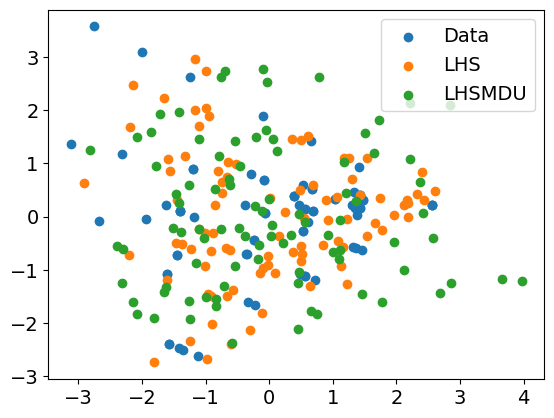

In [27]:
pca = PCA(n_components=2)
Xt1_pca = pca.fit_transform(data_scaled)
Xt2_pca = pca.fit_transform(all_val_samples_scaled)
Xt3_pca = pca.fit_transform(all_val_samples_mdu_scaled)  

plot_dimred_2dims_both_methods(Xt1_pca, Xt2_pca, Xt3_pca, filename_eps='Figures_4dim/plot_scaled_90pts.eps')

In [28]:
tol = 5e-1
tol2 = 5e-1
des_n_samp = 15

tol_samples, tol_samples_LHSMDU, tol_samples_unscaled, tol_samples_LHSMDU_unscaled = select_samples_diff_from_data(exp_data=data_array, samples_LHS=df_lhs.to_numpy(), samples_LHSMDU=df_lhsmdu.to_numpy(), des_n_samp = des_n_samp, tol = tol, tol2 = tol2)


In [29]:
df_15_samps_scaled = pd.DataFrame(tol_samples,columns=['PA-56','PhA','am-based','met-based'])
df_15_samps = pd.DataFrame(tol_samples_unscaled,columns=['PA-56','PhA','am-based','met-based'])

#### Check if add up to 100%

In [30]:
df_perc = df_15_samps*100
for i in range(len(df_perc)):
    if abs(sum(df_perc.iloc[i,:])-100)>1e-2:
        print(sum(df_perc.iloc[i,:]))

In [31]:
df_perc

,PA-56,PhA,am-based,met-based
0,81.6,3.0,7.6,7.8
1,82.7,0.3,4.3,12.7
2,82.1,3.7,9.4,4.8
3,81.7,3.8,3.1,11.4
4,80.1,4.1,8.5,7.3
5,80.1,2.2,6.8,10.9
6,83.6,4.0,1.6,10.8
7,80.3,4.3,4.6,10.8
8,80.2,0.1,8.0,11.7
9,96.9,0.0,3.0,0.1


In [32]:
filepath = Path('Outputs/postprocessed_outputs_15lhs_4dim.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_perc.to_csv(filepath, float_format='%.1f') 

### **6. Calculate other discrepancies and variance to check space filling properties/uniformity**

In [33]:
space = qmc.scale(df_15_samps, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)

0.17443959697347072

In [34]:
qmc.discrepancy(space, method='WD')

0.21801086931477281

In [35]:
np.linalg.norm(space.var())

np.float64(0.10648315121882089)

In [36]:
df_data = df[['PA-56','PhA','am-based','met-based']].copy()
df_data = df_data
df_with_data = pd.concat([df_15_samps, df_data], ignore_index=True, axis=0)

In [37]:
df_with_data

,PA-56,PhA,am-based,met-based
0,0.816,0.030,0.076,0.078
1,0.827,0.003,0.043,0.127
2,0.821,0.037,0.094,0.048
3,0.817,0.038,0.031,0.114
4,0.801,0.041,0.085,0.073
...,...,...,...,...
85,0.900,0.000,0.050,0.050
86,0.970,0.000,0.010,0.020
87,0.950,0.000,0.017,0.033
88,0.930,0.000,0.023,0.047


In [38]:
space = qmc.scale(df_with_data, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)

0.33972278055877514

In [39]:
qmc.discrepancy(space, method='WD')

0.24079397792801335

In [40]:
np.linalg.norm(space.var())

np.float64(0.09596360052516377)

In [41]:
df_15_samps_lhsmdu = pd.DataFrame(tol_samples_LHSMDU_unscaled,columns=['PA-56','PhA','am-based','met-based'])
df_15_samps_lhsmdu_scaled = pd.DataFrame(tol_samples_LHSMDU,columns=['PA-56','PhA','am-based','met-based'])

In [42]:
space = qmc.scale(df_15_samps_lhsmdu, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)

0.10865121164010748

In [43]:
qmc.discrepancy(space, method='WD')

0.1366149867398518

In [44]:
np.linalg.norm(space.var())

np.float64(0.10227703443877553)

#### Check if add up to 100%

In [45]:
df_perc_lhsmdu = df_15_samps_lhsmdu*100
for i in range(len(df_perc_lhsmdu)):
    if abs(sum(df_perc_lhsmdu.iloc[i,:])-100)>1e-2:
        print(sum(df_perc_lhsmdu.iloc[i,:]))

In [46]:
df_perc_lhsmdu

,PA-56,PhA,am-based,met-based
0,85.6,2.5,6.9,5.0
1,80.5,3.6,6.7,9.2
2,94.0,0.0,3.8,2.2
3,82.4,3.0,9.5,5.1
4,83.9,3.9,0.9,11.3
5,95.4,0.9,3.7,0.0
6,81.3,2.9,7.3,8.5
7,82.8,1.8,3.2,12.2
8,92.6,4.3,0.0,3.1
9,80.0,5.0,9.6,5.4


In [47]:
filepath = Path('Outputs/postprocessed_outputs_15lhsmdu_4dim.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_perc_lhsmdu.to_csv(filepath, float_format='%.1f') 

In [48]:
space = qmc.scale(df_15_samps_lhsmdu, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)

0.10865121164010748

In [49]:
qmc.discrepancy(space, method='WD')

0.1366149867398518

In [50]:
np.linalg.norm(space.var())

np.float64(0.10227703443877553)

In [51]:
df_lhsmdu_with_data = pd.concat([df_15_samps_lhsmdu, df_data], ignore_index=True, axis=0)

In [52]:
space = qmc.scale(df_lhsmdu_with_data, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)#default CD

0.36160593285506126

In [53]:
qmc.discrepancy(space, method='WD')

0.2622104372528448

In [54]:
np.linalg.norm(space.var())

np.float64(0.0949335246244331)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


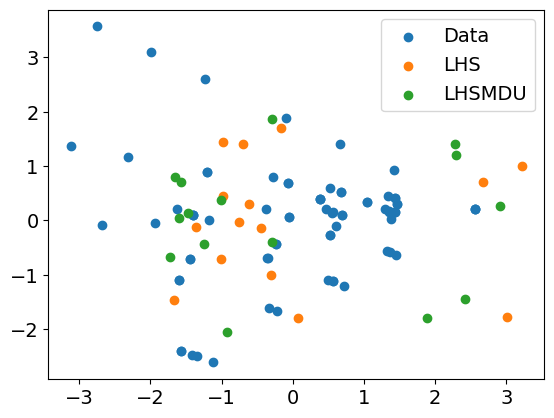

In [55]:
pca = PCA(n_components=2)
Xt1_pca = pca.fit_transform(data_scaled)
Xt2_pca = pca.fit_transform(df_15_samps_scaled)
Xt3_pca = pca.fit_transform(df_15_samps_lhsmdu_scaled)
    
plot_dimred_2dims_both_methods(Xt1_pca, Xt2_pca, Xt3_pca, filename_eps='Figures_4dim/plot_scaled_15pts.eps')

### **7. Distribution plots**

#### Distribution subplots of unscaled data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


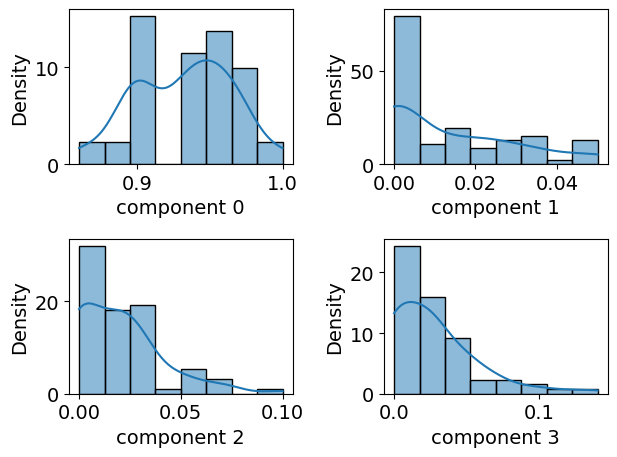

In [56]:
box_kdeplot_samples(data_array, filename_eps='Figures_4dim/dist_unscaled_expdata.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


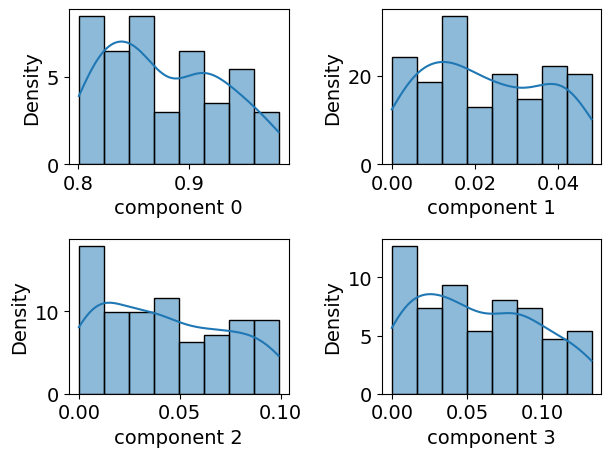

In [57]:
box_kdeplot_samples(df_lhs.to_numpy(), filename_eps='Figures_4dim/dist_unscaled_90ptsLHS.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


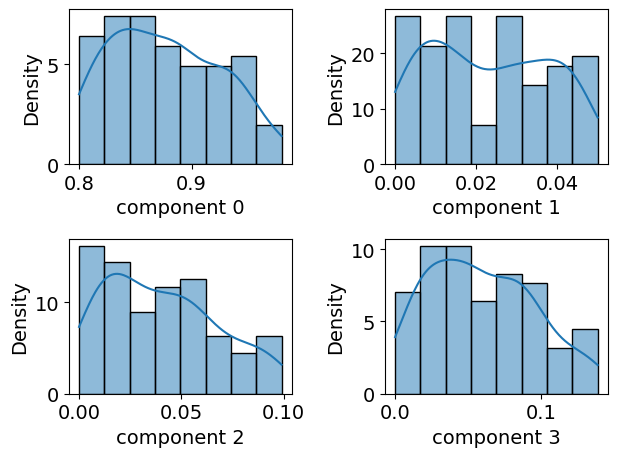

In [58]:
box_kdeplot_samples(df_lhsmdu.to_numpy(), filename_eps='Figures_4dim/dist_unscaled_90ptsLHSMDU.eps')

#### Distribution subplots of unscaled reduced data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


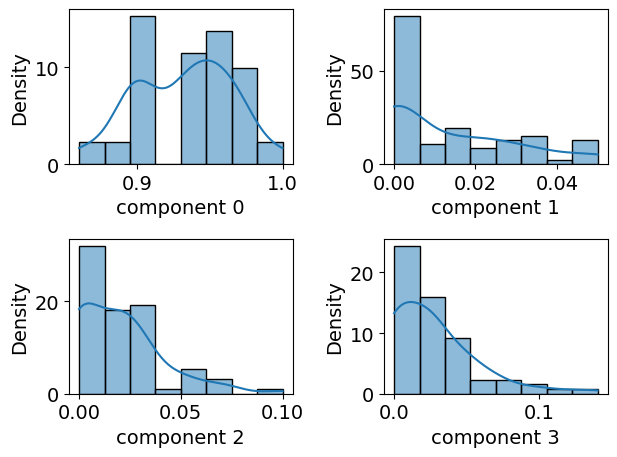

In [59]:
box_kdeplot_samples(data_array, filename_eps='Figures_4dim/dist_unscaled_expdata.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


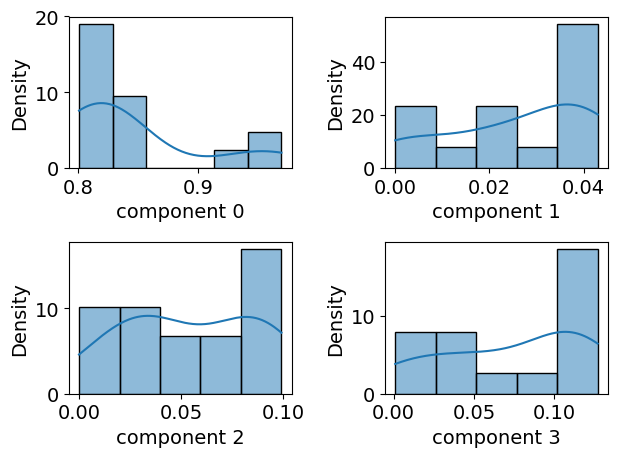

In [60]:
box_kdeplot_samples(tol_samples_unscaled, filename_eps='Figures_4dim/dist_unscaled_15ptsLHS.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


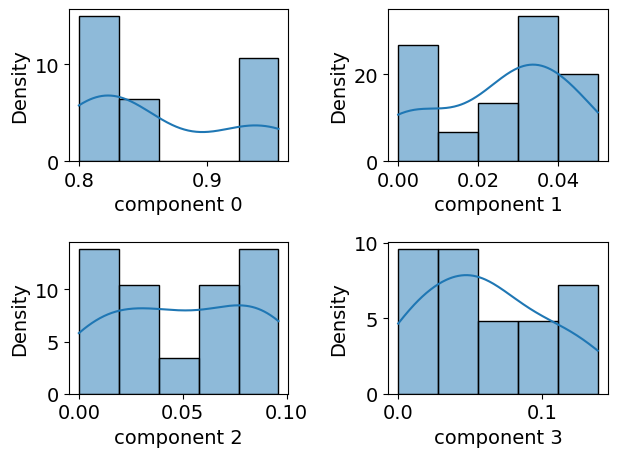

In [61]:
box_kdeplot_samples(tol_samples_LHSMDU_unscaled, filename_eps='Figures_4dim/dist_unscaled_15ptsLHSMDU.eps')

### **8. Discrepancy for LHS and LHSMDU without constraints**

#### LHS

In [62]:
n_samp = 90
seed = 1234
dim = 4

sampler_new = qmc.LatinHypercube(d=dim, seed=seed)
sample = sampler_new.random(n=n_samp)
sample = qmc.scale(sample, l_bounds, u_bounds)

In [63]:
np.linalg.norm(sample.var())

np.float64(0.13776673454913052)

In [64]:
qmc.discrepancy(sample)

2.2501202097322692

In [65]:
qmc.discrepancy(sample, method="WD")

1.4099637484686445

#### LHSMDU

In [66]:
seed = 1234
lhsmdu.setRandomSeed(seed)
sample_LHSMDU = lhsmdu.sample(4, n_samp).transpose()
sample_LHSMDU = qmc.scale(sample_LHSMDU, l_bounds, u_bounds)

In [67]:
np.linalg.norm(sample_LHSMDU.var())

np.float64(0.13778413014386207)

In [68]:
qmc.discrepancy(sample_LHSMDU)

2.2498156171362402

In [69]:
qmc.discrepancy(sample_LHSMDU, method="WD")

1.4093859929155612

#### Selected LHS and LHSMDU Samples by checking distance from data

In [70]:
tol = 5e-1
tol2 = 5e-1
des_n_samp = 15

tol_samples_comp, tol_samples_LHSMDU_comp, tol_samples_unscaled_comp, tol_samples_LHSMDU_unscaled_comp = select_samples_diff_from_data(exp_data=data_array, samples_LHS=sample, samples_LHSMDU=sample_LHSMDU, des_n_samp = des_n_samp, tol = tol, tol2 = tol2)


In [71]:
df_15_samps_scaled_comp = pd.DataFrame(tol_samples_comp,columns=['PA-56','PhA','am-based','met-based'])
df_15_samps_comp = pd.DataFrame(tol_samples_unscaled_comp,columns=['PA-56','PhA','am-based','met-based'])

In [72]:
df_15_samps_comp

,PA-56,PhA,am-based,met-based
0,0.945,0.013,0.088,0.118
1,0.826,0.017,0.038,0.088
2,0.834,0.018,0.012,0.095
3,0.831,0.002,0.036,0.102
4,0.869,0.001,0.078,0.013
5,0.922,0.045,0.076,0.105
6,0.965,0.041,0.034,0.127
7,0.809,0.028,0.012,0.122
8,0.961,0.047,0.023,0.005
9,0.910,0.043,0.099,0.104


In [73]:
space_comp = qmc.scale(df_15_samps_comp, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space_comp)

0.11384334197946648

In [74]:
qmc.discrepancy(space_comp, method='WD')

0.18016163954334843

In [75]:
np.linalg.norm(space_comp.var())

np.float64(0.10032320564058958)

In [76]:
df_15_samps_lhsmdu_scaled_comp = pd.DataFrame(tol_samples_LHSMDU_comp,columns=['PA-56','PhA','am-based','met-based'])
df_15_samps_lhsmdu_comp = pd.DataFrame(tol_samples_LHSMDU_unscaled_comp,columns=['PA-56','PhA','am-based','met-based'])

In [77]:
space_comp = qmc.scale(df_15_samps_lhsmdu_comp, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space_comp)

0.09733487691451843

In [78]:
qmc.discrepancy(space_comp, method='WD')

0.2212491277844194

In [79]:
np.linalg.norm(space_comp.var())

np.float64(0.10327768140589569)

#### Selected samples with data

In [80]:
df_with_data_comp = pd.concat([df_15_samps_comp, df_data], ignore_index=True, axis=0)
df_lhsmdu_with_data_comp = pd.concat([df_15_samps_lhsmdu_comp, df_data], ignore_index=True, axis=0)

In [81]:
space_comp = qmc.scale(df_with_data_comp, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space_comp)

0.3346614774204404

In [82]:
qmc.discrepancy(space_comp, method='WD')

0.2602568349083642

In [83]:
np.linalg.norm(space_comp.var())

np.float64(0.10086750566499746)

In [84]:
space_comp = qmc.scale(df_lhsmdu_with_data_comp, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space_comp)

0.3423673720877442

In [85]:
qmc.discrepancy(space_comp, method='WD')

0.24987945648802332

In [86]:
np.linalg.norm(space_comp.var())

np.float64(0.09937472504094227)